In [2]:
#上海：310000
#黄浦、浦东、杨浦、徐汇、虹口、静安、闵行、宝山、长宁、普陀、嘉定、崇明、奉贤、松江、青浦、金山
#n=[101,115,110,104,109,106,112,113,105,107,114,151,120,117,118,116]

In [90]:
import requests
from datetime import datetime
import pandas as pd
import numpy as np

In [91]:
url='https://api.inews.qq.com/newsqa/v1/query/pubished/daily/list?adCode=310000&amp;limit=120'
print(url)
get = requests.get(url=url).json()
data_ = get['data']

https://api.inews.qq.com/newsqa/v1/query/pubished/daily/list?adCode=310000&amp;limit=120


In [92]:
data1= pd.DataFrame(data_)
data1

,year,date,country,province,confirm,dead,heal,confirm_add,confirm_cuts,dead_cuts,...,heal_cuts,newConfirm,newHeal,newDead,description,wzz,wzz_add,_mtime,all_local_confirm_add,deadAdd
0,2022,03.02,中国,上海,4430,7,3879,42,,,...,,42,8,0,,15,-10,2022-03-03T00:02:52Z,-10,0
1,2022,03.03,中国,上海,4475,7,3888,45,,,...,,45,9,0,,29,-10,2022-03-03T23:56:07Z,-10,0
2,2022,03.04,中国,上海,4502,7,3900,27,,,...,,27,12,0,,45,-10,2022-03-05T00:09:28Z,-10,0
3,2022,03.05,中国,上海,4527,7,3908,25,,,...,,25,8,0,,73,-10,2022-03-06T00:04:15Z,-10,0
4,2022,03.06,中国,上海,4562,7,3973,35,,,...,,35,65,0,,118,-10,2022-03-06T23:57:34Z,-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022,06.25,中国,上海,63228,595,62515,4,,,...,,4,31,0,,14656,0,2022-06-26T00:00:20Z,0,0
116,2022,06.26,中国,上海,63236,595,62522,8,,,...,,8,7,0,,14658,2,2022-06-26T23:53:50Z,2,0
117,2022,06.27,中国,上海,63239,595,62526,3,,,...,,3,4,0,,14628,0,2022-06-28T00:02:56Z,0,0
118,2022,06.28,中国,上海,63240,595,62532,1,,,...,,1,6,0,,14628,0,2022-06-29T00:17:34Z,0,0


In [93]:
data=data1[['confirm','dead','heal']]
data

,confirm,dead,heal
0,4430,7,3879
1,4475,7,3888
2,4502,7,3900
3,4527,7,3908
4,4562,7,3973
...,...,...,...
115,63228,595,62515
116,63236,595,62522
117,63239,595,62526
118,63240,595,62532


In [94]:
ls = list(data.index+1)
data['date']=ls
data.head()

C:\Users\ADMINI~1\AppData\Local\Temp\1/ipykernel_12296/2723134379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']=ls


,confirm,dead,heal,date
0,4430,7,3879,1
1,4475,7,3888,2
2,4502,7,3900,3
3,4527,7,3908,4
4,4562,7,3973,5


In [127]:
data = pd.read_csv('data3.csv')
data.loc[:,'r'] = data["heal"] + data["dead"]
data.loc[:,'i'] = data["confirm"] - data["r"]
data.head(10)

,confirm,dead,heal,date,r,i
0,4430,7,3879,1,3886,544
1,4475,7,3888,2,3895,580
2,4502,7,3900,3,3907,595
3,4527,7,3908,4,3915,612
4,4562,7,3973,5,3980,582
5,4602,7,4000,6,4007,595
6,4631,7,4032,7,4039,592
7,4677,7,4050,8,4057,620
8,4720,7,4067,9,4074,646
9,4747,7,4087,10,4094,653


In [128]:
data.to_csv('data3.csv',index = False,encoding='utf-8-sig')

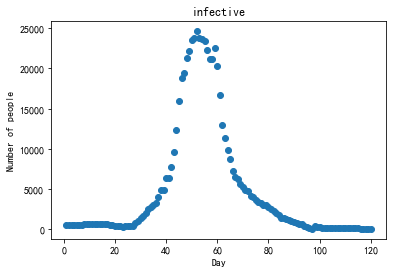

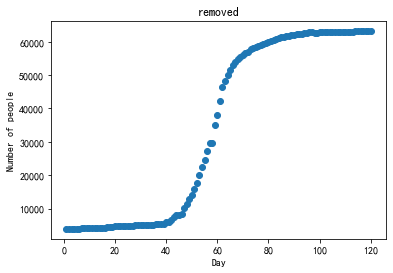

In [100]:
import matplotlib.pyplot as plt
plt.scatter(data['date'], data['i'])
plt.xlabel('Day')
plt.ylabel('Number of people')
plt.title('infective')
plt.show()

plt.scatter(data['date'], data['r'])
plt.xlabel('Day')
plt.ylabel('Number of people')
plt.title('removed')
plt.show()

In [129]:
data_new = pd.read_csv('data2.csv')

采用参数时变的SIR模型
患者数（i）和被移除者数量（r）

In [130]:
data_new.loc[:,'r'] = data_new["heal"] + data_new["dead"]
data_new.loc[:,'i'] = data_new["confirm"] - data_new["r"]
data_new.head(10)

,confirm,dead,heal,date,r,i
0,14471,7,6646,42,6653,7818
1,17044,7,7387,43,7394,9650
2,20244,7,7936,44,7943,12301
3,23838,7,7936,45,7943,15895
4,27078,7,8309,46,8316,18762
5,29498,10,10021,47,10031,19467
6,32582,17,11238,48,11255,21327
7,35077,24,12923,49,12947,22130
8,37712,32,14100,50,14132,23580
9,39643,43,15836,51,15879,23764


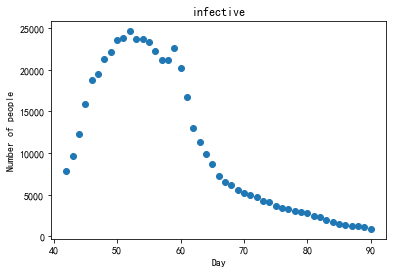

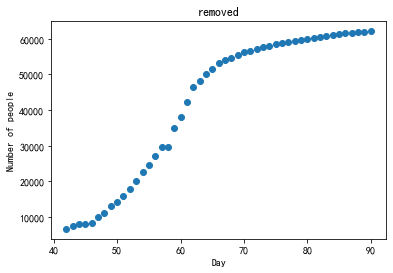

In [131]:
import matplotlib.pyplot as plt
plt.scatter(data_new['date'], data_new['i'])
plt.xlabel('Day')
plt.ylabel('Number of people')
plt.title('infective')
plt.show()

plt.scatter(data_new['date'], data_new['r'])
plt.xlabel('Day')
plt.ylabel('Number of people')
plt.title('removed')
plt.show()

In [132]:
#求i，r差分
data_new['new_r']=data_new['r'].diff(1)
data_new['new_i']=data_new['i'].diff(1)

#clear NaN
data_new.drop(0,inplace=True) 

#get u,lamba
data_new['u'] = data_new['new_r'] / data_new['i']
data_new['lam'] = (data_new['new_r']+data_new['new_i']) / data_new['i']
data_new.head(10)

,confirm,dead,heal,date,r,i,new_r,new_i,u,lam
1,17044,7,7387,43,7394,9650,741.0,1832.0,0.076788,0.266632
2,20244,7,7936,44,7943,12301,549.0,2651.0,0.044631,0.260141
3,23838,7,7936,45,7943,15895,0.0,3594.0,0.000000,0.226109
4,27078,7,8309,46,8316,18762,373.0,2867.0,0.019881,0.172689
5,29498,10,10021,47,10031,19467,1715.0,705.0,0.088098,0.124313
6,32582,17,11238,48,11255,21327,1224.0,1860.0,0.057392,0.144605
7,35077,24,12923,49,12947,22130,1692.0,803.0,0.076457,0.112743
8,37712,32,14100,50,14132,23580,1185.0,1450.0,0.050254,0.111747
9,39643,43,15836,51,15879,23764,1747.0,184.0,0.073515,0.081257
10,42379,55,17715,52,17770,24609,1891.0,845.0,0.076842,0.111179


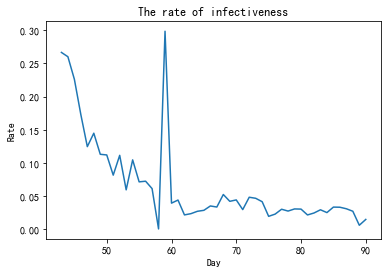

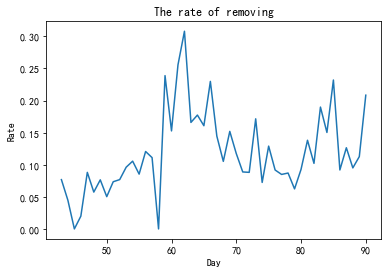

In [133]:
#painting u and lam
plt.plot(data_new['date'], data_new['lam'])
plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('The rate of infectiveness')
plt.show()

plt.plot(data_new['date'], data_new['u'])
plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('The rate of removing')
plt.show()

0.0001589871652949748 -0.024615598271735595
[0.2060951  0.19531138 0.18484564 0.17469788 0.16486809 0.15535627
 0.14616242 0.13728656 0.12872866 0.12048874 0.11256679 0.10496282
 0.09767683 0.0907088  0.08405875 0.07772668 0.07171258 0.06601645
 0.0606383  0.05557813 0.05083592 0.0464117  0.04230544 0.03851716
 0.03504686 0.03189453 0.02906017 0.02654379 0.02434538 0.02246495
 0.02090249 0.019658   0.01873149 0.01812295 0.01783239 0.0178598
 0.01820519 0.01886855 0.01984989 0.0211492  0.02276648 0.02470174
 0.02695497 0.02952618 0.03241536 0.03562252 0.03914765 0.04299075]


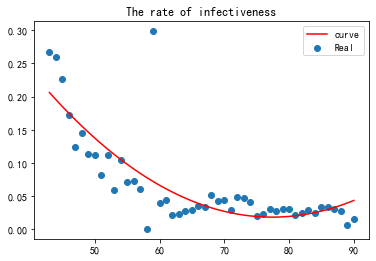

-0.00012271457080200617 0.01780396855124244


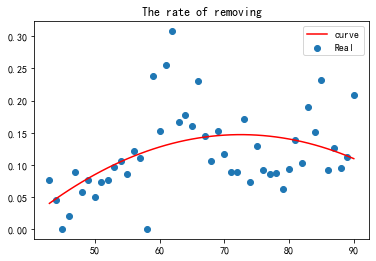

In [134]:
import math
from scipy import optimize as op
def f_1(x, A, B, C):
    return A * x**2 + B * x + C
x = np.array(data_new['date'].tolist())
y1 = np.array(data_new['lam'].tolist())

A1, B1, C1= op.curve_fit(f_1,x,y1)[0]
print(A1,B1)
plt.scatter(x,y1,marker='o',label='Real')
yf1 = f_1(x,A1,B1,C1)
print(yf1)
plt.plot(x, yf1,color='red',label='curve')
plt.title('The rate of infectiveness')
plt.legend() # 显示label
plt.show()

y2 = np.array(data_new['u'].tolist())
A2, B2 ,C2 = op.curve_fit(f_1,x,y2)[0]
print(A2,B2)
plt.scatter(x,y2,marker='o',label='Real')
yf2 = f_1(x,A2,B2,C2)
plt.plot(x, yf2,color='red',label='curve')
plt.legend() # 显示label
plt.title('The rate of removing')
plt.show()

[ 9650 12301 15895 18762 19467 21327 22130 23580 23764 24609 23728 23698
 23364 22282 21217 21217 22566 20261 16716 12990 11366  9877  8720  7296
  6564  6232  5613  5228  4934  4743  4215  4087  3682  3443  3263  3078
  2982  2806  2512  2330  2007  1783  1487  1404  1281  1199  1083   907]


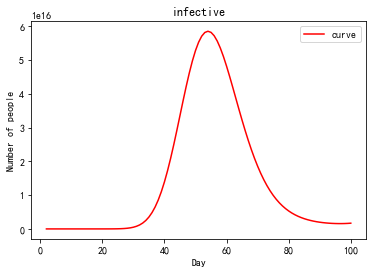

In [135]:
#常微分方程数值解
x = np.array(data_new['date'].tolist())
from scipy.integrate import odeint
i = np.array(data_new['i'].tolist())
r = np.array(data_new['r'].tolist())
print(i)
initial = r[0]
initial1 = i[0]
def sol_i(x,y):
    return (f_1(x,A1,B1,C1) - f_1(x,A2,B2,C2)) * y
x = np.linspace(2,100,99)
n_i = odeint(sol_i,initial1,x,tfirst=True)


plt.plot(x,n_i,color='red',label='curve')
plt.xlabel('Day')
plt.ylabel('Number of people')
plt.title('infective')
plt.legend() # 显示label
plt.show()

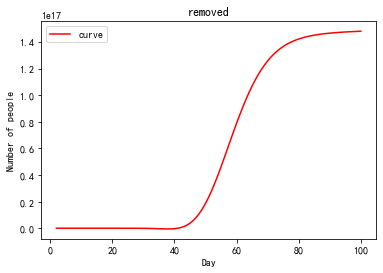

In [136]:
def get_i(x):
    return n_i[int(x)-2]
def sol_r(x,y):
    return f_1(x,A2,B2,C2) * get_i(x)
n_r = odeint(sol_r,initial,x,tfirst=True)


plt.plot(x,n_r,color='red',label='curve')
plt.xlabel('Day')
plt.ylabel('Number of people')
plt.title('removed')
plt.legend() # 显示label
plt.show()